<a href="https://colab.research.google.com/github/mariamb81/pattern-recognition-coursework/blob/main/SYDE_572_A2_mbusari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [ ]:
def refresh():
  plt.show()
  plt.close()

In [ ]:
# distance functions
def dM(X1, X2):
  dist = np.sum(np.abs(X1-X2), axis=1)
  return np.array(dist)

def dE(X1, X2):
  dist = np.sqrt(np.sum((X1 - X2)**2, axis=1))
  return np.array(dist)

def mahalanobis(X1, X2, cov):
  # calculate the inverse covariance matrix
  inv_cov = LA.inv(cov)
  dist = np.sqrt(np.sum((X1 - X2) @ inv_cov * (X1 - X2), axis=1))
  return np.array(dist)

In [ ]:
# test functions
X1 = np.zeros([10, 3]) # array of zeros
X2 = np.ones([10, 3]) # array of ones
cov = 2*np.eye(3)
print("Manhattan Distance")
print(dM(X1, X2))
print("Euclidean Distance")
print(dE(X1, X2))
print("Mahalanobis Distance ")
print(mahalanobis(X1, X2, cov))

Manhattan Distance
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
Euclidean Distance
[1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 1.73205081]
Mahalanobis Distance 
[1.22474487 1.22474487 1.22474487 1.22474487 1.22474487 1.22474487
 1.22474487 1.22474487 1.22474487 1.22474487]


In [ ]:
from keras.datasets import mnist

https://keras.io/api/datasets/mnist/#mnist-digits-classification-dataset

In [ ]:
# load all data
(x_train_a, y_train_a), (x_test_a, y_test_a) = mnist.load_data()

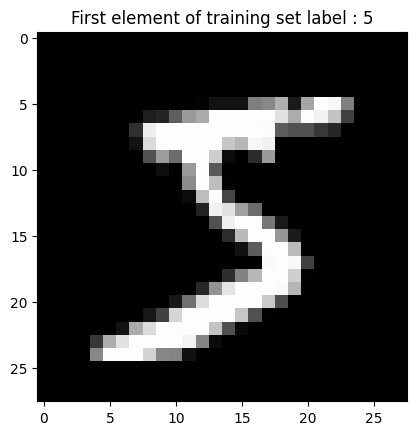

Label : 5


In [ ]:
# plot first element of training set
element0 = x_train_a[0]
label0 = y_train_a[0]
fig = plt.figure
plt.imshow(element0, cmap='gray')
plt.title("First element of training set label : " + str(label0))
refresh()
print("Label : " + str(label0))

In [ ]:
# reshape test data into the shape (10000, 784)
x_len = len(x_test_a)
x_test = x_test_a.reshape(-1, 784)
split1 = int(x_len*0.60)
split2 = split1 + int(x_len*0.20)

# split test data into a 60:20:20
X_train, X_val, X_test = (x_test[0:split1], x_test[split1: split2], x_test[split2:])
y_train, y_val, y_test = (y_test_a[0:split1], y_test_a[split1: split2], y_test_a[split2:])

print("X_train shape")
print(X_train.shape)
print("X_val shape")
print(X_val.shape)
print("X_test shape")
print(X_test.shape)

print("y_train shape")
print(y_train.shape)
print("y_val shape")
print(y_val.shape)
print("y_test shape")
print(y_test.shape)

X_train shape
(6000, 784)
X_val shape
(2000, 784)
X_test shape
(2000, 784)
y_train shape
(6000,)
y_val shape
(2000,)
y_test shape
(2000,)


In [ ]:
# prototype retrieval functions implementation
def ProtMean(X, Y):
  prototypes = []
  # for each class find the class mean
  for i in range(10):
    class_mean = np.mean(X[Y == i], axis=0)
    prototypes.append(class_mean)
  return np.float32(prototypes)

def ProtNN(x, X, Y):
  prototypes = []
  for i in range(10):
    class_pts = X[Y == i]
    dist_xx = dE(x, class_pts)
    NN_idx = np.argmin(dist_xx)
    prototypes.append(class_pts[NN_idx])
  return np.float32(prototypes)

# k nearest neighbour
def ProtkNN(x, X, Y, k):
  # find the k nearest neighbours from each class 0-9
  kNN_arr = []
  for i in range(10):
    class_pts = X[Y == i]
    # indices that would sort the knn
    kNN_idx = np.argsort(dE(x, class_pts))[:k]
    mean_kNN = np.mean(class_pts[kNN_idx], axis=0)
    kNN_arr.append(mean_kNN)
  # return an array with the mean of the kNN for each cluster
  return np.float32((kNN_arr))

In [ ]:
# test prototype functions
k = 2
x = X_train[0]
X = X_train
Y = y_train

In [ ]:
# define a plotting function
def plt_number(element, title):
  fig = plt.figure
  plt.imshow(element, cmap='gray')
  plt.title(title)

In [ ]:
prot_mean = ProtMean(X, Y)
prot_nn = ProtNN(x, X, Y)
prot_knn = ProtkNN(x, X, Y, k=2)

In [ ]:
print(prot_mean.shape)
print(prot_nn.shape)
print(prot_knn.shape)

(10, 784)
(10, 784)
(10, 784)


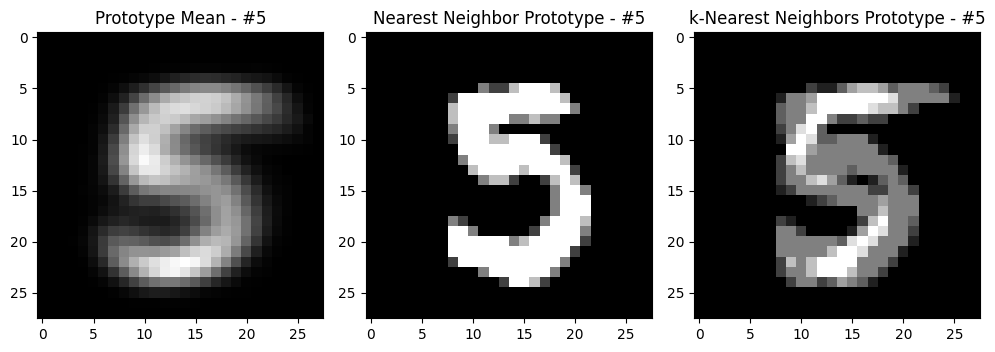

In [ ]:
# plot the prototypes for the class of x
plt.figure(figsize=(10, 5))
titles = ['Prototype Mean - #5', 'Nearest Neighbor Prototype - #5', 'k-Nearest Neighbors Prototype - #5']
plt.subplot(1, 3, 1)
plt_number(prot_mean[5].reshape((28,28)), titles[0])
plt.subplot(1, 3, 2)
plt_number(prot_nn[5].reshape((28,28)), titles[1])
plt.subplot(1, 3, 3)
plt_number(prot_knn[5].reshape((28,28)), titles[2])
plt.tight_layout()
refresh()

In [ ]:
# create an euclidean classifier
def classify(X, X_train, y_train, prot="mean", k=0):
  X = np.float32(X)
  X_train = np.float32(X_train)
  y_train = np.float32(y_train)
  if prot == "mean":
    # find the prototypes of all clusters
    prototypes = ProtMean(X_train, y_train)
    y = []
    # For each point, compare the distance between each prototype
    for x in X:
        dist = dE(np.float32(x), np.float32(prototypes))
        y.append(np.argmin(dist))
    return y
  elif prot == "NN":
    y = []
    for x in X:
      prototypes = ProtNN(x, X_train, y_train)
      dist = dE(np.float32(x), np.float32(prototypes))
      y.append(np.argmin(dist))
    return y
  elif prot == "kNN":
    y = []
    for x in X:
      prototypes = ProtkNN(x, X_train, y_train, k)
      dist = dE(np.float32(x), np.float32(prototypes))
      y.append(np.argmin(dist))
  return y

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import time
# validate classifiers on the validation set
def validate(val_X, val_y, X_train, y_train, classifier="mean", k=1):
    start = time.time()
    predictions = classify(val_X, X_train, y_train, classifier, k)
    end = time.time()
    accuracy = accuracy_score(predictions, val_y)
    runtime = end - start
    return accuracy, runtime

In [ ]:
# validate classifiers with validation set
print(f"MED validation accuracy/runtime: {validate(X_val, y_val, X_train, y_train, 'mean')}")
print(f"NN validation accuracy/runtime: {validate(X_val, y_val, X_train, y_train, 'NN')}")
print(f"kNN validation accuracy/runtime: {validate(X_val, y_val, X_train, y_train, 'kNN', 3)}")

MED validation accuracy/runtime: (0.806, 0.05512118339538574)
NN validation accuracy/runtime: (0.9525, 21.748666286468506)
kNN validation accuracy/runtime: (0.9715, 20.527623414993286)


In [ ]:
# select the most accurate classifier on the validation set
most_accurate = "kNN"
best_k = 3
# evaluate the classifier on the test set
y_pred = classify(X_test, X_train, y_train, prot=most_accurate, k=3)
print(f"kNN test accuracy/runtime: {validate(X_test, y_test, X_train, y_train, classifier=most_accurate, k=best_k)}")


kNN test accuracy/runtime: (0.9535, 20.043780088424683)


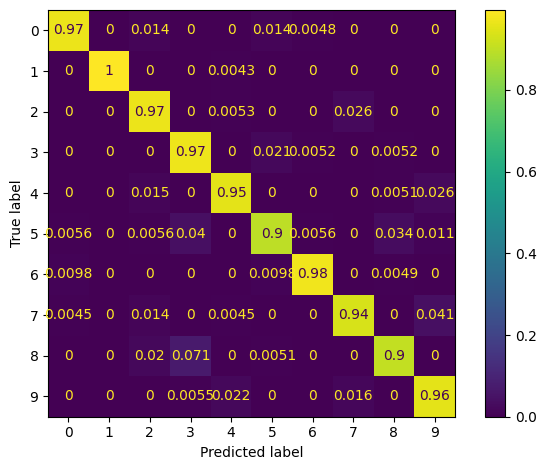

In [ ]:
# plot a normalized confusion matrix
cm = confusion_matrix(y_pred, y_test, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_val))
disp.plot()
plt.tight_layout()
refresh()